In [1]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import cmath
import math
from scipy import io, stats
from scipy.stats import mannwhitneyu, normaltest, zscore, wilcoxon, ttest_rel
from statannotations.Annotator import Annotator
import matplotlib as mpl
import matplotlib.patheffects as path_effects

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,get_outputs_wTraces,print_df
from metrics import get_R2

fig_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/manuscript'

# Figure 1: How do the decoding models work?

In [ ]:
from preprocessing_funcs import bin_spikes
from preprocessing_funcs import bin_output

data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/datasets/'
filename = 'vars-pa29dir4A-pre500-post300.mat'
dt = 50
data = io.loadmat(data_folder+'vars/'+filename)

spike_times  =  data['spike_times'] # spike times of all neurons
pos          =  data['pos'] # x and y eye positions
out_times    =  data['vels_times'] # times at which velocities were recorded
out_times    =  np.squeeze(out_times)

conditions = data['contConditions']

spike_times  =  np.squeeze(spike_times)
for i in range(spike_times.shape[0]):
    spike_times[i]  =  np.squeeze(spike_times[i])
    
##############################################################################################
trial = [644]

spikes = []
for sublist in spike_times:
    s = sublist[np.logical_and(sublist>np.where(np.isin(conditions[:,0],trial))[0][0], sublist<np.where(np.isin(conditions[:,0],trial))[0][-1])]
    spikes.append(s)  

fig, ax = plt.subplots(figsize=(12, 3))

ax.eventplot(spikes[:40], colors='mediumpurple', linelengths=0.8, lineoffsets=np.arange(40));
ax.eventplot(spikes[40:], colors='forestgreen', linelengths=0.8, lineoffsets=np.arange(40,len(spikes)));

ax.axis('off')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#fig.savefig(fig_folder+'/examp_spikes.png', dpi=600, bbox_inches='tight')

##############################################################
fig, ax = plt.subplots(figsize=(12, 3))

poses = pos[np.isin(conditions[:,0],trial)]

ax.plot(-1*poses[:,0], label='HE', color='gray', linestyle='-', linewidth=5)
ax.plot(-1*poses[:,1], label='VE', color='gray', linestyle='--', linewidth=5)

#plt.legend()

ax.axis('off')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#fig.savefig(fig_folder+'/examp_eyepos.png', dpi=600, bbox_inches='tight')

# Figure 2: How well do the decoding models perform?

In [2]:
data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs'

pal = sns.color_palette("Reds",20)
pal = pal[8:]
custom_palette = sns.color_palette("Reds", n_colors=4)
mtfef_pal = ['forestgreen','mediumpurple']

column_names = ['sess','repeat','outer_fold','nMT','nFEF','model','R2','rho','R2_null','rho_null','time_elapsed']
df0,yTest_all0,yTestPred_all0,yTestN_all0,yTestNPred_all0 = get_outputs_wTraces(data_folder+'/Figure2',["-o0-","s29"],column_names)
df1,yTest_all1,yTestPred_all1,yTestN_all1,yTestNPred_all1 = get_outputs_wTraces(data_folder+'/Figure2',["-o1-","s29"],column_names)
df2,yTest_all2,yTestPred_all2,yTestN_all2,yTestNPred_all2 = get_outputs_wTraces(data_folder+'/Figure2',["-o2-","s29"],column_names)

df = pd.concat([df0,df1,df2],ignore_index=False)

df.head(11)

,sess,repeat,outer_fold,nMT,nFEF,model,time_elapsed,R2_x,R2_y,rho_x,rho_y,R2N_x,R2N_y,rhoN_x,rhoN_y,output
0,29,0,0,24,41,0,37.160122,0.633339,0.680768,0.797246,0.836006,-0.713105,-0.728356,-0.014400,-0.024110,position
1,29,0,1,24,41,0,35.522138,0.617187,0.685114,0.794708,0.829603,-0.732346,-0.677110,0.003316,-0.002979,position
2,29,0,2,24,41,0,35.496874,0.630212,0.669007,0.809284,0.827951,-0.656168,-0.718566,0.009550,0.014412,position
3,29,0,3,24,41,0,11.865045,0.636264,0.674148,0.803940,0.825867,-0.685862,-0.703134,0.003231,0.010029,position
4,29,0,4,24,41,0,16.237424,0.618645,0.677830,0.794446,0.831703,-0.650907,-0.640065,-0.000583,-0.010501,position
5,29,0,5,24,41,0,12.859240,0.601383,0.666728,0.802845,0.816628,-0.724489,-0.687129,0.010025,-0.014745,position
6,29,0,6,24,41,0,42.230611,0.642897,0.671609,0.816721,0.819524,-0.584197,-0.698992,0.028348,-0.008884,position
7,29,0,7,24,41,0,42.239831,0.637932,0.667992,0.805119,0.826533,-0.576325,-0.763128,0.012052,-0.014796,position
8,29,0,8,24,41,0,42.120314,0.591105,0.655180,0.810573,0.815908,-0.674655,-0.698122,0.006710,-0.002712,position
9,29,0,9,24,41,0,42.147781,0.638594,0.687125,0.804720,0.831144,-0.666414,-0.785317,-0.004980,0.015771,position


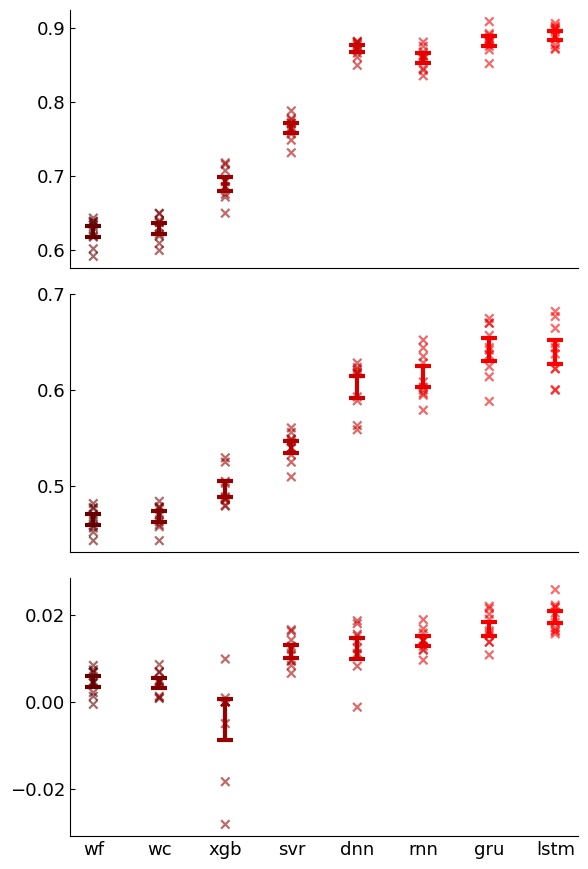

In [4]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(3,1,figsize=(6,9),sharex=True)
fig.tight_layout()
show_patrick = 0

#pal = sns.color_palette("Reds", n_colors=8, desat=1.0)
pal =[(1.0, 0.0, 0.0),   # Maroon
      (0.95, 0.0, 0.0),  # Lighter Red
      (0.9, 0.0, 0.0),   # Slightly Dark Red
      (0.8, 0.0, 0.0),   # Dark Red
      (0.7, 0.0, 0.0),   # Darker Red
      (0.6, 0.0, 0.0),   # Medium Red
      (0.5, 0.0, 0.0),   # Slightly Lighter Red
      (0.4, 0.0, 0.0)]
pal = pal[::-1]

sess = 29
values = ['R2_x']
nulls = ['R2N_x','R2N_y']
outputs = ['position','velocity','acceleration']

for v in range(len(values)):
    for o in range(len(outputs)):
        wf   = (df.loc[(df['model']==0) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        wc   = (df.loc[(df['model']==1) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        xgb  = (df.loc[(df['model']==2) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        svr  = (df.loc[(df['model']==3) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        dnn  = (df.loc[(df['model']==4) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        rnn  = (df.loc[(df['model']==5) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        gru  = (df.loc[(df['model']==6) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values
        lstm = (df.loc[(df['model']==7) & (df['sess']==sess) & (df['output']==outputs[o])][values[v]]).values

        n=10
        means=([np.mean(wf),np.mean(wc),np.mean(xgb),np.mean(svr),np.mean(dnn),np.mean(rnn),np.mean(gru),np.mean(lstm)])
        err=([np.std(wf)*np.sqrt(1./n+1./(n-1)),np.std(wc)*np.sqrt(1./n+1./(n-1)),np.std(xgb)*np.sqrt(1./n+1./(n-1)),np.std(svr)*np.sqrt(1./n+1./(n-1)),np.std(dnn)*np.sqrt(1./n+1./(n-1)),np.std(rnn)*np.sqrt(1./n+1./(n-1)),np.std(gru)*np.sqrt(1./n+1./(n-1)),np.std(lstm)*np.sqrt(1./n+1./(n-1))])

        ind = np.arange(len(err)) #X values for plotting

        for pos, y, yerr, color in zip(ind, means, err, pal): #Loop through methods and plot error bars
            ax[o].errorbar(pos, y, yerr, lw=3, capsize=6, capthick=3, color=color)

            ax[o].set_xticks([0,1,2,3,4,5,6,7])
            if o==2:
                ax[o].set_xticklabels(['wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)
            else:
                ax[o].set_xticklabels(['','','','','','','',''], rotation=0)

            #Remove right and top boundaries, and make ticks inward
            ax[o].tick_params(direction='in',bottom=0)
            ax[o].spines['right'].set_color('none')
            ax[o].spines['top'].set_color('none')
           # ax.set_yticks([0.6,0.7,0.8,0.9])
           # ax.set_ylim([0.55,0.9])

            #Plot individual R2 values for each fold as an 'x'
            scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(8)),(80,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
            scatter_y=np.concatenate((wf,wc,xgb,svr,dnn,rnn,gru,lstm),axis=0) #Y values for plotting

            colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
            for i in scatter_x.astype(int).reshape((1,-1))[0]:
                colors_list.append(pal[i])

            ax[o].scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.1)

            # Perform Wilcoxon signed-rank test and add significance asterisks
            #R2_horz = R2_all[o][pos][:,0]
            #R2_vert = R2_all[o][pos][:,1]
            
#             R2_horz = (df.loc[(df['model']==0) & (df['sess']==29) & (df['output']=='position')]['R2_x']).values
#             R2_vert = (df.loc[(df['model']==0) & (df['sess']==29) & (df['output']=='position')]['R2_y']).values
            
#             p_value = wilcoxon(R2_horz,R2_vert)[1]
            
#             if p_value < 0.001:
#                 significance = '***'
#             elif p_value < 0.01:
#                 significance = '**'
#             elif p_value < 0.05:
#                 significance = '*'
#             else:
#                 significance = 'ns'

#             _, max_val = ax[o].get_ylim()
#             max_val_per_group = max(df[values[v]][(df['model'] == pos) & (df['sess']==sess) & (df['output']==outputs[o])].max(), df[nulls[v]][(df['model'] == pos) & (df['sess']==sess) & (df['output']==outputs[o])].max())
#             top_cap_y = max_val_per_group * 1.01

#             ax[o].text(pos, top_cap_y, significance, ha='center', va='bottom', fontsize=16)
            
        if o==0:
            ax[o].set_yticks([0.6,0.7,0.8,0.9])
        elif o==1:
            ax[o].set_yticks([0.5,0.6,0.7])
        elif o==2:
            ax[o].set_yticks([-0.02,0,0.02])
            
plt.subplots_adjust(wspace=0.25, hspace=0.1)     
fig.savefig(fig_folder+'/R2_posVelAcc.png', dpi=600, bbox_inches='tight')

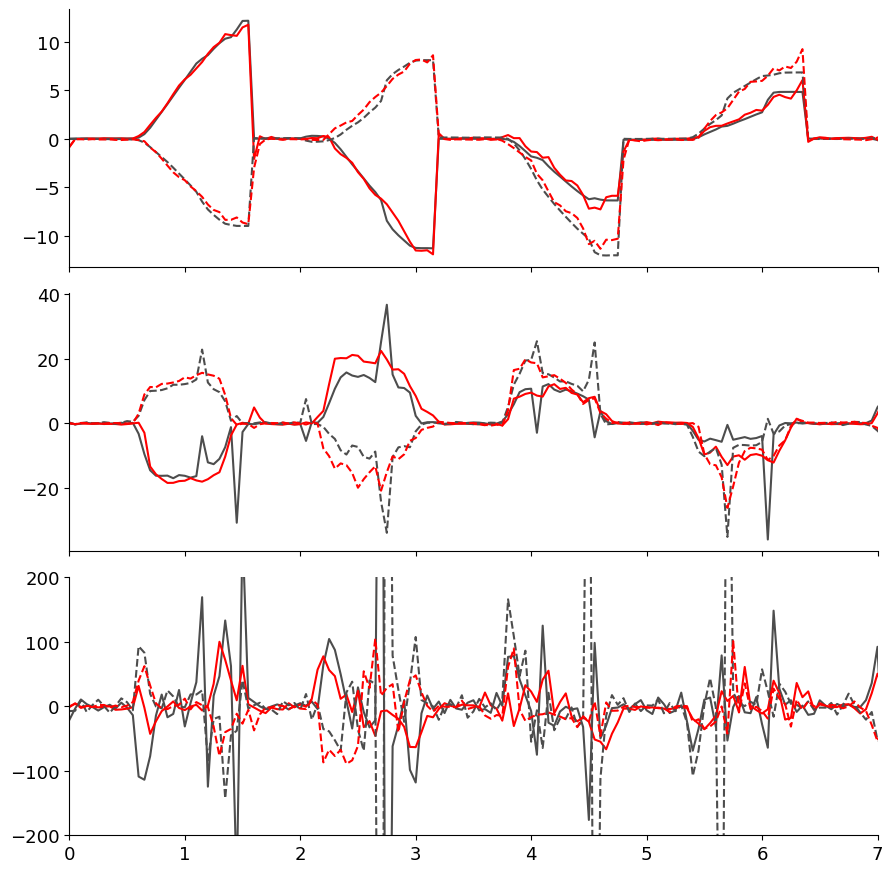

In [5]:
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(3,1,figsize=(9,9),sharex=True)
fig.tight_layout()

y_test = yTest_all0
y_test_predicted = yTestPred_all0
DF = df0

mean_values = DF[['R2_x','R2_y']].mean(axis=1)
mi = mean_values.idxmax()

with open(data_folder+'/Figure2/s29-t0-d050-m{:02d}-o0-nm24-nf41-bn1-fo10-fi01/fold{:02d}.pickle'.format(DF.loc[mi]['model'],DF.loc[mi]['outer_fold']), 'rb') as f:
    _,conds,_,_,_,_ = pickle.load(f)

trl_nums = np.unique(conds[:,0])
trl_nums, indices = np.unique(conds[:,0], return_index=True)
trl_dirs = conds[indices,3]

plot_trls = np.array([3,6,24,27,28])
start_end = np.where(np.isin(conds[:, 0],trl_nums[plot_trls]))[0]
x = np.arange(0, start_end.shape[0]*50, 50) / 1000

axes[0].plot(x,y_test[mi][start_end,0], color=(0.3,0.3,0.3), linewidth=1.5, label='true (horizontal)')
axes[0].plot(x,y_test_predicted[mi][start_end,0], color=pal[7], linewidth=1.5, label='predicted (horizontal)')
axes[0].plot(x,y_test[mi][start_end,1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=1.5, label='true (vertical)')
axes[0].plot(x,y_test_predicted[mi][start_end,1], color=pal[7], linestyle='dashed', linewidth=1.5, label='predicted (vertical)')
axes[0].set_xlim(x[0],x[-1]-0.95)
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')

for o in range(2):
    if o==0:
        y_test = yTest_all1
        y_test_predicted = yTestPred_all1
        DF = df1
    else:
        y_test = yTest_all2
        y_test_predicted = yTestPred_all2
        DF = df2
    axes[o+1].plot(x,y_test[mi][start_end,0], color=(0.3,0.3,0.3), linewidth=1.5, label='true (horizontal)')
    axes[o+1].plot(x,y_test_predicted[mi][start_end,0], color=pal[7], linewidth=1.5, label='predicted (horizontal)')
    axes[o+1].plot(x,y_test[mi][start_end,1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=1.5, label='true (vertical)')
    axes[o+1].plot(x,y_test_predicted[mi][start_end,1], color=pal[7], linestyle='dashed', linewidth=1.5, label='predicted (vertical)')
    
    axes[o+1].spines['right'].set_color('none')
    axes[o+1].spines['top'].set_color('none')
    
    if o==1:
        axes[o+1].set_ylim(-200,200)
        
plt.subplots_adjust(wspace=0.25, hspace=0.1)
#fig.savefig(fig_folder+'/model_stacktraces.png', dpi=600, bbox_inches='tight') 